## RF PatternTraces

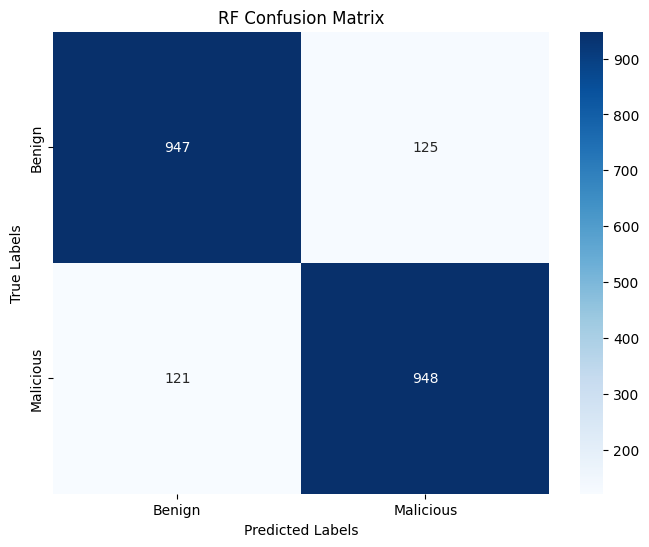

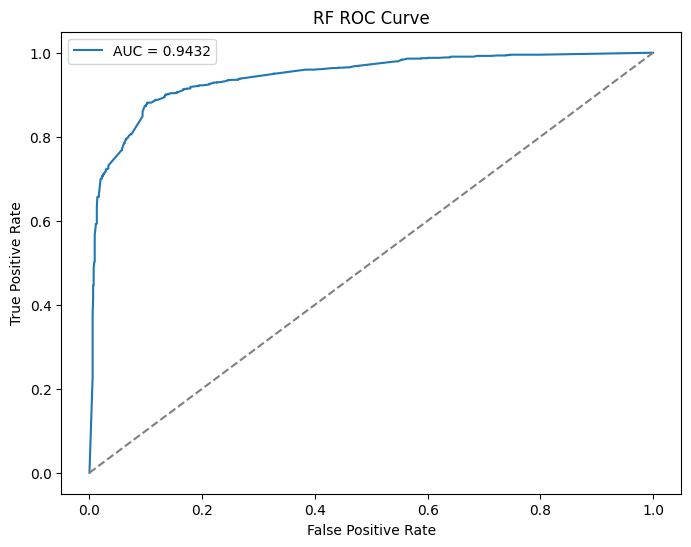

Train Accuracy: 0.90149164
Validation Accuracy: 0.88276506
Test Accuracy: 0.88510042
Precision: 0.88510640
Recall: 0.88510042
F1 Score: 0.88510032
ROC AUC: 0.94324013
Cohen's Kappa: 0.77020159
Training Time (s): 6.53859639
Validation Time (s): 0.07669783
Test Time (s): 0.07931256
Model saved at: RF_best_model_ngrams.pkl


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_fscore_support, cohen_kappa_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Load dataset
file_path = 'D:/Final Version/Step 14 CombinedTraces/CombinedDataset/FinalCombinedBenignMaliciousDataset-v2.csv'
data = pd.read_csv(file_path)

# Define all pattern columns including advanced patterns
all_pattern_columns = ['Pattern_1', 'Pattern_2', 'Pattern_3', 'Pattern_4', 'Pattern_5', 
                       'Pattern_6', 'Pattern_7', 'Pattern_8', 'Pattern_9', 'Pattern_10']

# Combining all pattern columns into a single text feature for N-gram analysis
data['Combined_Patterns'] = data[all_pattern_columns].fillna('').agg(' '.join, axis=1)

# Target variable
X = data['Combined_Patterns']
y = data['Level']

# Applying N-gram feature extraction with bi-grams and tri-grams
vectorizer = CountVectorizer(ngram_range=(2, 3))
X_ngram = vectorizer.fit_transform(X)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_ngram, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Train the model and record training time
start_train_time = time.time()
rf_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Predictions
y_train_pred = rf_model.predict(X_train)
y_val_pred = rf_model.predict(X_val)
y_test_pred = rf_model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Calculate AUC for test set
y_test_prob = rf_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_prob)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_test_pred)

# Record validation and test times
start_val_time = time.time()
rf_model.predict(X_val)
val_time = time.time() - start_val_time

start_test_time = time.time()
rf_model.predict(X_test)
test_time = time.time() - start_test_time

# Save the model
model_path = 'RF_best_model_ngrams.pkl'
joblib.dump(rf_model, model_path)

# Visualizations and saving plots
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('RF Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('RF Confusion Matrix.png')  # Save the plot
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('RF ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('RF ROC Curve.png')  # Save the plot
plt.show()

# Print metrics
metrics = {
    "Train Accuracy": train_acc,
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": test_auc,
    "Cohen's Kappa": kappa,
    "Training Time (s)": train_time,
    "Validation Time (s)": val_time,
    "Test Time (s)": test_time,
}
for metric, value in metrics.items():
    print(f"{metric}: {value:.8f}")

print(f"Model saved at: {model_path}")

## DT PatternTraces

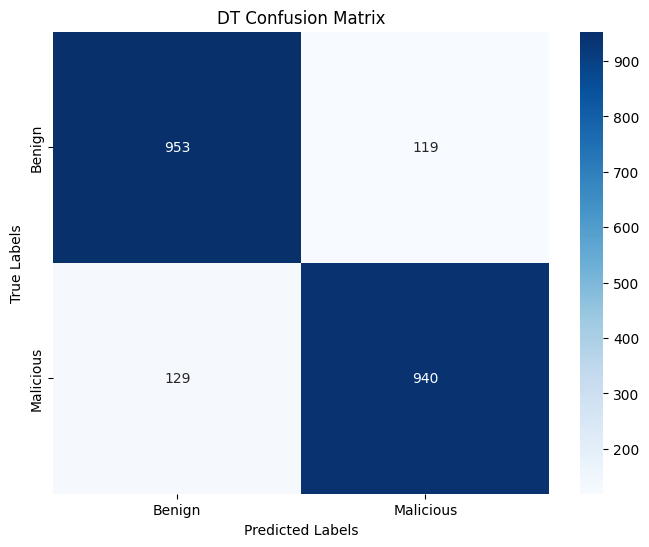

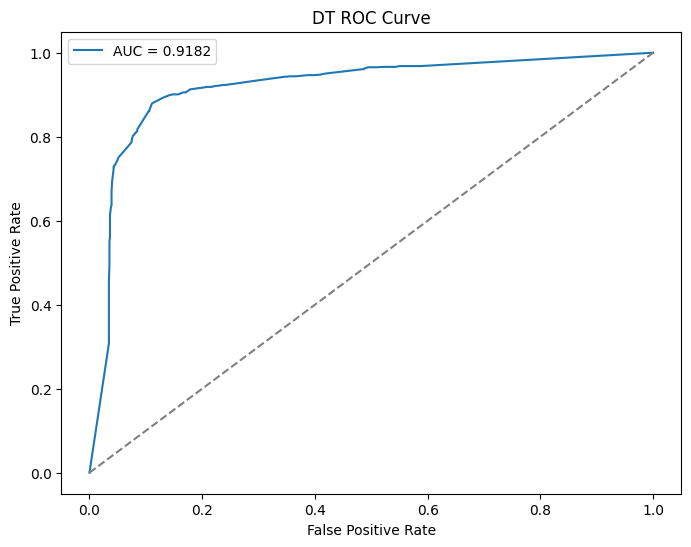

Train Accuracy: 0.90159175
Validation Accuracy: 0.87902849
Test Accuracy: 0.88416628
Precision: 0.88419829
Recall: 0.88416628
F1 Score: 0.88416299
ROC AUC: 0.91817311
Cohen's Kappa: 0.76832907
Training Time (s): 0.95001411
Validation Time (s): 0.00400972
Test Time (s): 0.00349331
Model saved at: DT_best_model_ngrams.pkl


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_fscore_support, cohen_kappa_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Load dataset
file_path = 'D:/Final Version/Step 14 CombinedTraces/CombinedDataset/FinalCombinedBenignMaliciousDataset-v2.csv'
data = pd.read_csv(file_path)

# Define all pattern columns including advanced patterns
all_pattern_columns = ['Pattern_1', 'Pattern_2', 'Pattern_3', 'Pattern_4', 'Pattern_5', 
                       'Pattern_6', 'Pattern_7', 'Pattern_8', 'Pattern_9', 'Pattern_10']

# Combining all pattern columns into a single text feature for N-gram analysis
data['Combined_Patterns'] = data[all_pattern_columns].fillna('').agg(' '.join, axis=1)

# Target variable
X = data['Combined_Patterns']
y = data['Level']

# Applying N-gram feature extraction with bi-grams and tri-grams
vectorizer = CountVectorizer(ngram_range=(2, 3))
X_ngram = vectorizer.fit_transform(X)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_ngram, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model and record training time
start_train_time = time.time()
dt_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Predictions
y_train_pred = dt_model.predict(X_train)
y_val_pred = dt_model.predict(X_val)
y_test_pred = dt_model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Calculate AUC for test set
y_test_prob = dt_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_prob)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_test_pred)

# Record validation and test times
start_val_time = time.time()
dt_model.predict(X_val)
val_time = time.time() - start_val_time

start_test_time = time.time()
dt_model.predict(X_test)
test_time = time.time() - start_test_time

# Save the model
model_path = 'DT_best_model_ngrams.pkl'
joblib.dump(dt_model, model_path)

# Visualizations and saving plots
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('DT Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('DT Confusion Matrix.png')  # Save the plot
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('DT ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('DT ROC Curve.png')  # Save the plot
plt.show()

# Print metrics
metrics = {
    "Train Accuracy": train_acc,
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": test_auc,
    "Cohen's Kappa": kappa,
    "Training Time (s)": train_time,
    "Validation Time (s)": val_time,
    "Test Time (s)": test_time,
}
for metric, value in metrics.items():
    print(f"{metric}: {value:.8f}")

print(f"Model saved at: {model_path}")

## SVM PatternTraces

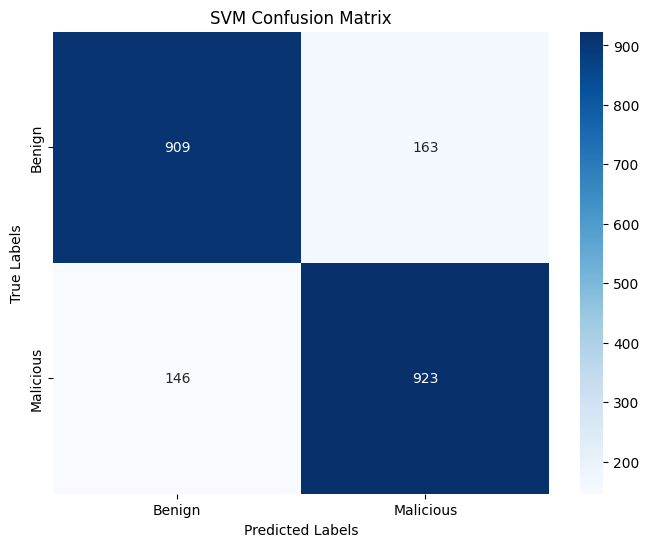

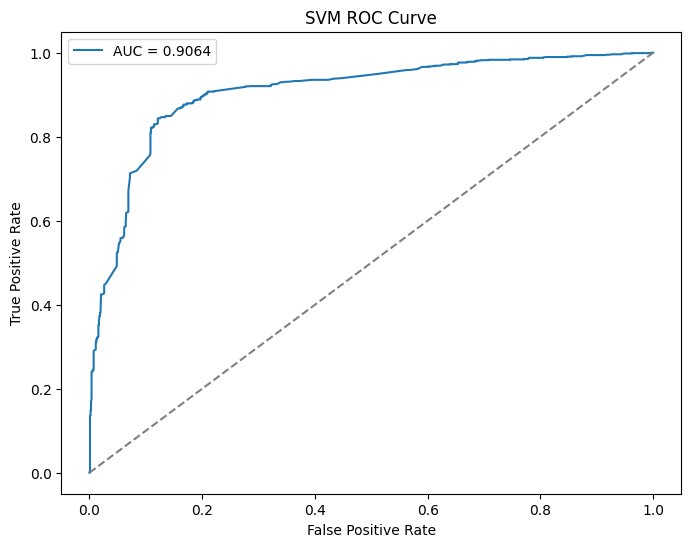

Train Accuracy: 0.86575233
Validation Accuracy: 0.85987856
Test Accuracy: 0.85567492
Precision: 0.85576785
Recall: 0.85567492
F1 Score: 0.85566742
ROC AUC: 0.90637609
Cohen's Kappa: 0.71135569
Training Time (s): 212.71976638
Validation Time (s): 5.35924578
Test Time (s): 5.18664169
Model saved at: SVM_best_model_ngrams.pkl


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_fscore_support, cohen_kappa_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Load dataset
file_path = 'D:/Final Version/Step 14 CombinedTraces/CombinedDataset/FinalCombinedBenignMaliciousDataset-v2.csv'
data = pd.read_csv(file_path)

# Define all pattern columns including advanced patterns
all_pattern_columns = ['Pattern_1', 'Pattern_2', 'Pattern_3', 'Pattern_4', 'Pattern_5', 
                       'Pattern_6', 'Pattern_7', 'Pattern_8', 'Pattern_9', 'Pattern_10']

# Combining all pattern columns into a single text feature for N-gram analysis
data['Combined_Patterns'] = data[all_pattern_columns].fillna('').agg(' '.join, axis=1)

# Target variable
X = data['Combined_Patterns']
y = data['Level']

# Applying N-gram feature extraction with bi-grams and tri-grams
vectorizer = CountVectorizer(ngram_range=(2, 3))
X_ngram = vectorizer.fit_transform(X)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_ngram, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize SVM model with probability=True for AUC/ROC calculations
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Train the model and record training time
start_train_time = time.time()
svm_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Predictions
y_train_pred = svm_model.predict(X_train)
y_val_pred = svm_model.predict(X_val)
y_test_pred = svm_model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Calculate AUC for test set
y_test_prob = svm_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_prob)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_test_pred)

# Record validation and test times
start_val_time = time.time()
svm_model.predict(X_val)
val_time = time.time() - start_val_time

start_test_time = time.time()
svm_model.predict(X_test)
test_time = time.time() - start_test_time

# Save the model
model_path = 'SVM_best_model_ngrams.pkl'
joblib.dump(svm_model, model_path)

# Visualizations and saving plots
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('SVM Confusion Matrix.png')  # Save the plot
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('SVM ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('SVM ROC Curve.png')  # Save the plot
plt.show()

# Print metrics
metrics = {
    "Train Accuracy": train_acc,
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": test_auc,
    "Cohen's Kappa": kappa,
    "Training Time (s)": train_time,
    "Validation Time (s)": val_time,
    "Test Time (s)": test_time,
}
for metric, value in metrics.items():
    print(f"{metric}: {value:.8f}")

print(f"Model saved at: {model_path}")


## LR PatternTraces

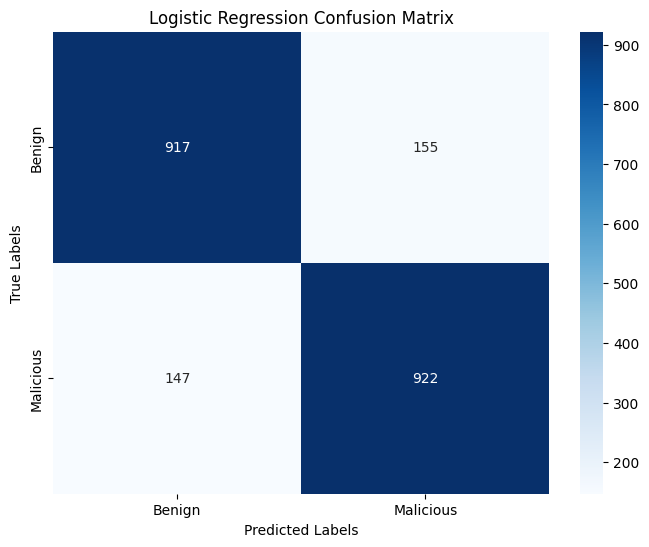

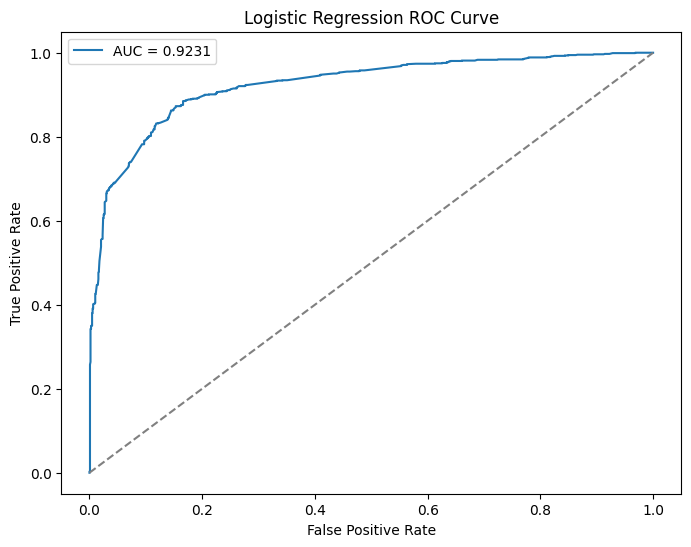

Train Accuracy: 0.86445090
Validation Accuracy: 0.85941149
Test Accuracy: 0.85894442
Precision: 0.85896594
Recall: 0.85894442
F1 Score: 0.85894319
ROC AUC: 0.92306330
Cohen's Kappa: 0.71789124
Training Time (s): 1.75919557
Validation Time (s): 0.00000000
Test Time (s): 0.00100040
Model saved at: LR_best_model_ngrams.pkl


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_fscore_support, cohen_kappa_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Load dataset
file_path = 'D:/Final Version/Step 14 CombinedTraces/CombinedDataset/FinalCombinedBenignMaliciousDataset-v2.csv'
data = pd.read_csv(file_path)

# Define all pattern columns including advanced patterns
all_pattern_columns = ['Pattern_1', 'Pattern_2', 'Pattern_3', 'Pattern_4', 'Pattern_5', 
                       'Pattern_6', 'Pattern_7', 'Pattern_8', 'Pattern_9', 'Pattern_10']

# Combining all pattern columns into a single text feature for N-gram analysis
data['Combined_Patterns'] = data[all_pattern_columns].fillna('').agg(' '.join, axis=1)

# Target variable
X = data['Combined_Patterns']
y = data['Level']

# Applying N-gram feature extraction with bi-grams and tri-grams
vectorizer = CountVectorizer(ngram_range=(2, 3))
X_ngram = vectorizer.fit_transform(X)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_ngram, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model and record training time
start_train_time = time.time()
lr_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Predictions
y_train_pred = lr_model.predict(X_train)
y_val_pred = lr_model.predict(X_val)
y_test_pred = lr_model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Calculate AUC for test set
y_test_prob = lr_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_prob)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_test_pred)

# Record validation and test times
start_val_time = time.time()
lr_model.predict(X_val)
val_time = time.time() - start_val_time

start_test_time = time.time()
lr_model.predict(X_test)
test_time = time.time() - start_test_time

# Save the model
model_path = 'LR_best_model_ngrams.pkl'
joblib.dump(lr_model, model_path)

# Visualizations and saving plots
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('Logistic Regression Confusion Matrix.png')  # Save the plot
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Logistic Regression ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('Logistic Regression ROC Curve.png')  # Save the plot
plt.show()

# Print metrics
metrics = {
    "Train Accuracy": train_acc,
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": test_auc,
    "Cohen's Kappa": kappa,
    "Training Time (s)": train_time,
    "Validation Time (s)": val_time,
    "Test Time (s)": test_time,
}
for metric, value in metrics.items():
    print(f"{metric}: {value:.8f}")

print(f"Model saved at: {model_path}")


## KNN Pattern Traces

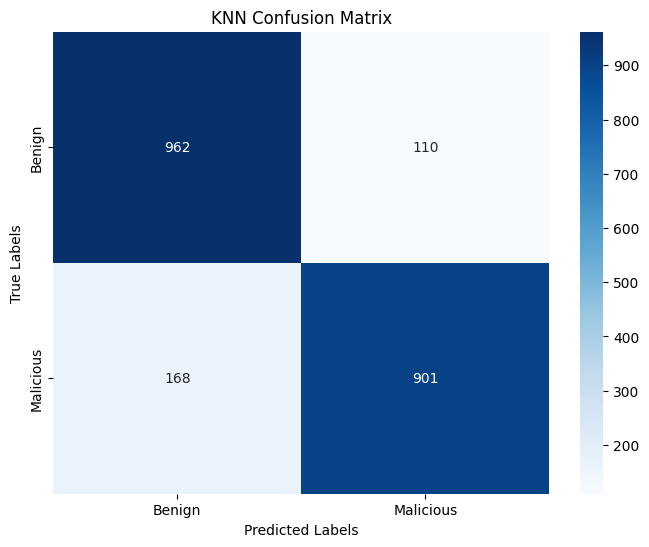

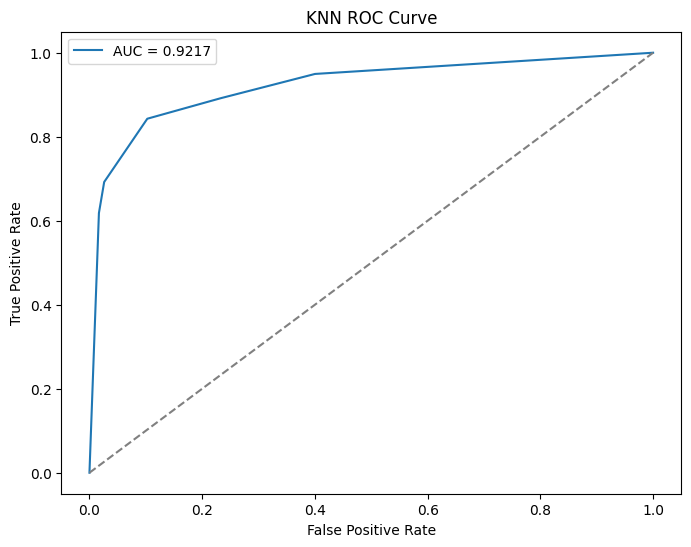

Train Accuracy: 0.87165882
Validation Accuracy: 0.86968706
Test Accuracy: 0.87015413
Precision: 0.87123420
Recall: 0.87015413
F1 Score: 0.87005383
ROC AUC: 0.92167844
Cohen's Kappa: 0.74028804
Training Time (s): 0.00553298
Validation Time (s): 2.71542692
Test Time (s): 2.42880058
Model saved at: KNN_best_model_ngrams.pkl


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_fscore_support, cohen_kappa_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Load dataset
file_path = 'D:/Final Version/Step 14 CombinedTraces/CombinedDataset/FinalCombinedBenignMaliciousDataset-v2.csv'
data = pd.read_csv(file_path)

# Define all pattern columns including advanced patterns
all_pattern_columns = ['Pattern_1', 'Pattern_2', 'Pattern_3', 'Pattern_4', 'Pattern_5', 
                       'Pattern_6', 'Pattern_7', 'Pattern_8', 'Pattern_9', 'Pattern_10']

# Combining all pattern columns into a single text feature for N-gram analysis
data['Combined_Patterns'] = data[all_pattern_columns].fillna('').agg(' '.join, axis=1)

# Target variable
X = data['Combined_Patterns']
y = data['Level']

# Applying N-gram feature extraction with bi-grams and tri-grams
vectorizer = CountVectorizer(ngram_range=(2, 3))
X_ngram = vectorizer.fit_transform(X)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_ngram, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize KNN model with k=5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model and record training time
start_train_time = time.time()
knn_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Predictions
y_train_pred = knn_model.predict(X_train)
y_val_pred = knn_model.predict(X_val)
y_test_pred = knn_model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Calculate AUC for test set
y_test_prob = knn_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_prob)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_test_pred)

# Record validation and test times
start_val_time = time.time()
knn_model.predict(X_val)
val_time = time.time() - start_val_time

start_test_time = time.time()
knn_model.predict(X_test)
test_time = time.time() - start_test_time

# Save the model
model_path = 'KNN_best_model_ngrams.pkl'
joblib.dump(knn_model, model_path)

# Visualizations and saving plots
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('KNN Confusion Matrix.png')  # Save the plot
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('KNN ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('KNN ROC Curve.png')  # Save the plot
plt.show()

# Print metrics
metrics = {
    "Train Accuracy": train_acc,
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": test_auc,
    "Cohen's Kappa": kappa,
    "Training Time (s)": train_time,
    "Validation Time (s)": val_time,
    "Test Time (s)": test_time,
}
for metric, value in metrics.items():
    print(f"{metric}: {value:.8f}")

print(f"Model saved at: {model_path}")


## GB Pattern Traces

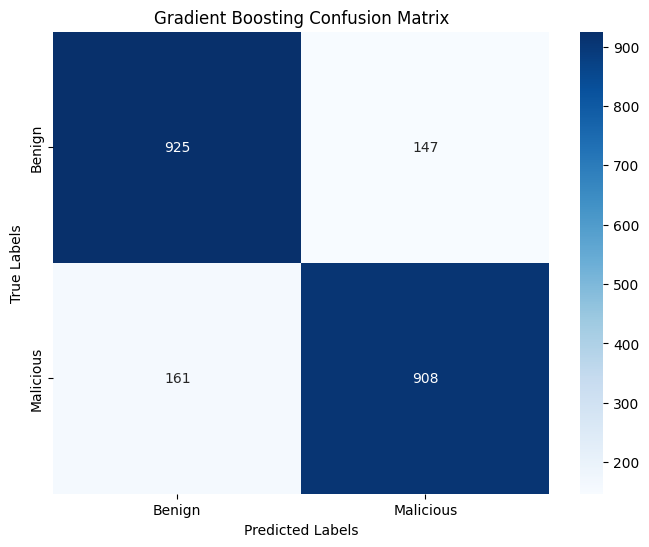

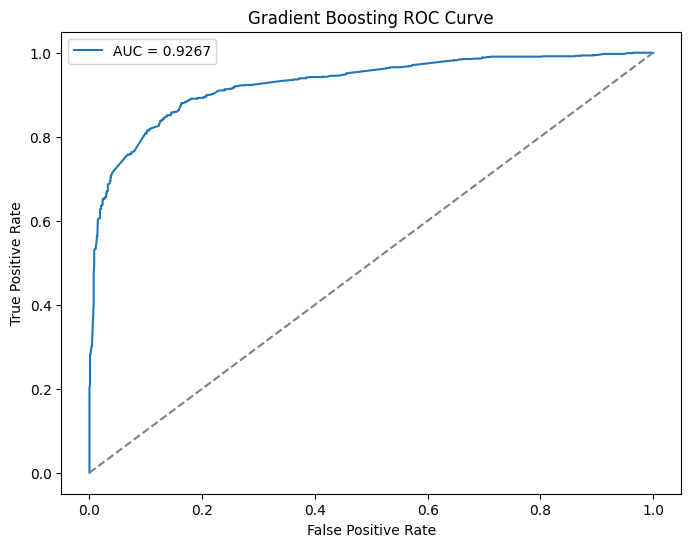

Train Accuracy: 0.86154770
Validation Accuracy: 0.85333956
Test Accuracy: 0.85614199
Precision: 0.85620028
Recall: 0.85614199
F1 Score: 0.85613452
ROC AUC: 0.92665720
Cohen's Kappa: 0.71227814
Training Time (s): 8.41540003
Validation Time (s): 0.01461554
Test Time (s): 0.01631069
Model saved at: GB_best_model_ngrams.pkl


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_fscore_support, cohen_kappa_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Load dataset
file_path = 'D:/Final Version/Step 14 CombinedTraces/CombinedDataset/FinalCombinedBenignMaliciousDataset-v2.csv'
data = pd.read_csv(file_path)

# Define all pattern columns including advanced patterns
all_pattern_columns = ['Pattern_1', 'Pattern_2', 'Pattern_3', 'Pattern_4', 'Pattern_5', 
                       'Pattern_6', 'Pattern_7', 'Pattern_8', 'Pattern_9', 'Pattern_10']

# Combining all pattern columns into a single text feature for N-gram analysis
data['Combined_Patterns'] = data[all_pattern_columns].fillna('').agg(' '.join, axis=1)

# Target variable
X = data['Combined_Patterns']
y = data['Level']

# Applying N-gram feature extraction with bi-grams and tri-grams
vectorizer = CountVectorizer(ngram_range=(2, 3))
X_ngram = vectorizer.fit_transform(X)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_ngram, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model and record training time
start_train_time = time.time()
gb_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Predictions
y_train_pred = gb_model.predict(X_train)
y_val_pred = gb_model.predict(X_val)
y_test_pred = gb_model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Calculate AUC for test set
y_test_prob = gb_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_prob)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
kappa = cohen_kappa_score(y_test, y_test_pred)

# Record validation and test times
start_val_time = time.time()
gb_model.predict(X_val)
val_time = time.time() - start_val_time

start_test_time = time.time()
gb_model.predict(X_test)
test_time = time.time() - start_test_time

# Save the model
model_path = 'GB_best_model_ngrams.pkl'
joblib.dump(gb_model, model_path)

# Visualizations and saving plots
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('Gradient Boosting Confusion Matrix.png')  # Save the plot
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Gradient Boosting ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('Gradient Boosting ROC Curve.png')  # Save the plot
plt.show()

# Print metrics
metrics = {
    "Train Accuracy": train_acc,
    "Validation Accuracy": val_acc,
    "Test Accuracy": test_acc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC": test_auc,
    "Cohen's Kappa": kappa,
    "Training Time (s)": train_time,
    "Validation Time (s)": val_time,
    "Test Time (s)": test_time,
}
for metric, value in metrics.items():
    print(f"{metric}: {value:.8f}")

print(f"Model saved at: {model_path}")


In [13]:
import pandas as pd

# Create a dictionary with the results
results = {
    "Model": ["Random Forest", "Decision Tree", "SVM", "Logistic Regression", "KNN", "Gradient Boosting"],
    "Train Accuracy": [0.90149164, 0.90159175, 0.86575233, 0.86445090, 0.87165882, 0.86154770],
    "Validation Accuracy": [0.88276506, 0.87902849, 0.85987856, 0.85941149, 0.86968706, 0.85333956],
    "Test Accuracy": [0.88510042, 0.88416628, 0.85567492, 0.85894442, 0.87015413, 0.85614199],
    "Precision": [0.88510640, 0.88419829, 0.85576785, 0.85896594, 0.87123420, 0.85620028],
    "Recall": [0.88510042, 0.88416628, 0.85567492, 0.85894442, 0.87015413, 0.85614199],
    "F1 Score": [0.88510032, 0.88416299, 0.85566742, 0.85894319, 0.87005383, 0.85613452],
    "ROC AUC": [0.94324013, 0.91817311, 0.90637609, 0.92306330, 0.92167844, 0.92665720],
    "Cohen's Kappa": [0.77020159, 0.76832907, 0.71135569, 0.71789124, 0.74028804, 0.71227814],
    "Training Time (s)": [6.53859639, 0.95001411, 212.71976638, 1.75919557, 0.00553298, 8.41540003],
    "Validation Time (s)": [0.07669783, 0.00400972, 5.35924578, 0.00010015, 2.71542692, 0.01461554],
    "Test Time (s)": [0.07931256, 0.00349331, 5.18664169, 0.00100040, 2.42880058, 0.01631069],
}

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Save the results to a CSV file
csv_file_path = "model_comparison_results.csv"
results_df.to_csv(csv_file_path, index=False)
results_df

,Model,Train Accuracy,Validation Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC AUC,Cohen's Kappa,Training Time (s),Validation Time (s),Test Time (s)
0,Random Forest,0.901492,0.882765,0.885100,0.885106,0.885100,0.885100,0.943240,0.770202,6.538596,0.076698,0.079313
1,Decision Tree,0.901592,0.879028,0.884166,0.884198,0.884166,0.884163,0.918173,0.768329,0.950014,0.004010,0.003493
2,SVM,0.865752,0.859879,0.855675,0.855768,0.855675,0.855667,0.906376,0.711356,212.719766,5.359246,5.186642
3,Logistic Regression,0.864451,0.859411,0.858944,0.858966,0.858944,0.858943,0.923063,0.717891,1.759196,0.000100,0.001000
4,KNN,0.871659,0.869687,0.870154,0.871234,0.870154,0.870054,0.921678,0.740288,0.005533,2.715427,2.428801
5,Gradient Boosting,0.861548,0.853340,0.856142,0.856200,0.856142,0.856135,0.926657,0.712278,8.415400,0.014616,0.016311


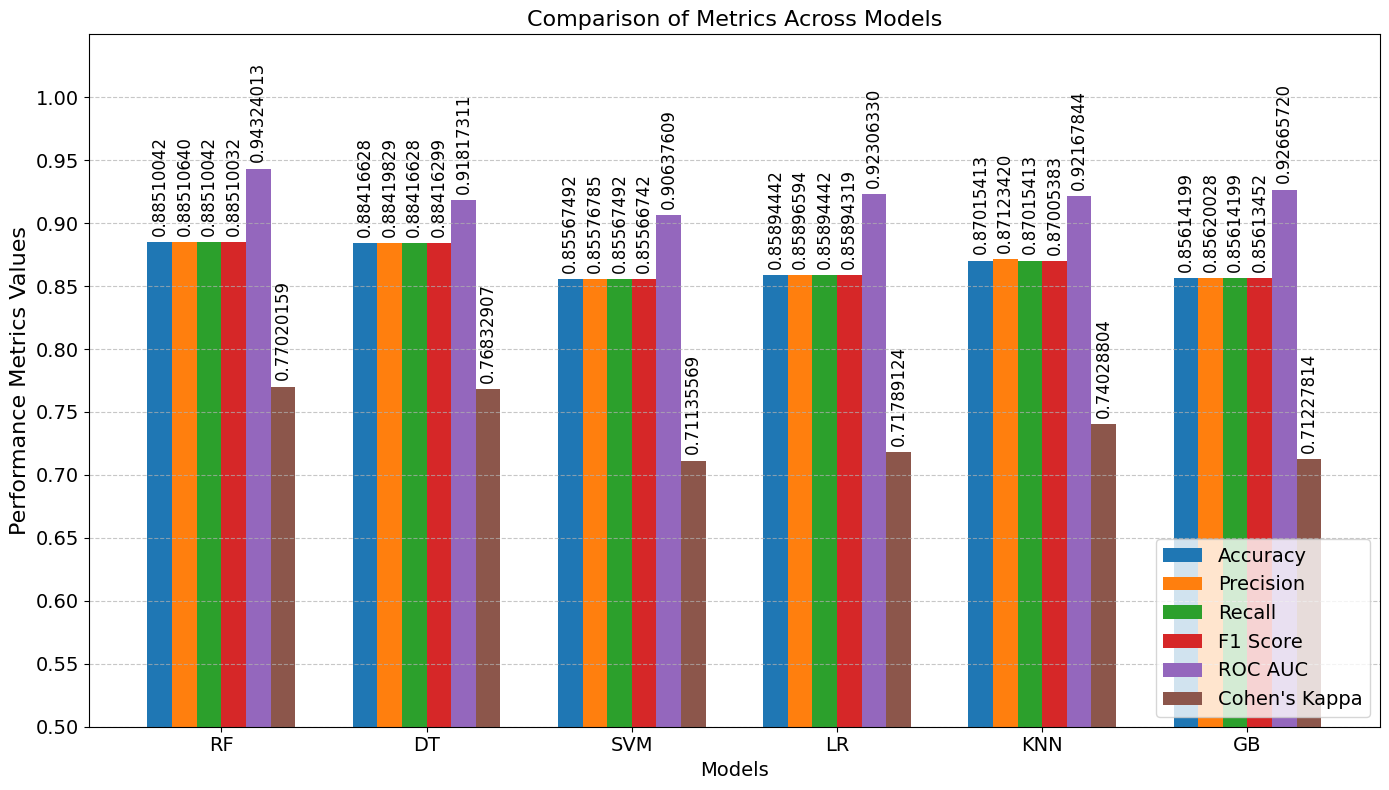

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = {
    "Accuracy": [0.88510042, 0.88416628, 0.85567492, 0.85894442, 0.87015413, 0.85614199],
    "Precision": [0.88510640, 0.88419829, 0.85576785, 0.85896594, 0.87123420, 0.85620028],
    "Recall": [0.88510042, 0.88416628, 0.85567492, 0.85894442, 0.87015413, 0.85614199],
    "F1 Score": [0.88510032, 0.88416299, 0.85566742, 0.85894319, 0.87005383, 0.85613452],
    "ROC AUC": [0.94324013, 0.91817311, 0.90637609, 0.92306330, 0.92167844, 0.92665720],
    "Cohen's Kappa": [0.77020159, 0.76832907, 0.71135569, 0.71789124, 0.74028804, 0.71227814],
}
models = ["RF", "DT", "SVM", "LR", "KNN", "GB"]

# Bar width and positions
bar_width = 0.12
x = np.arange(len(models))
fig, ax = plt.subplots(figsize=(14, 8))

# Plotting bars for each metric
for i, (metric, values) in enumerate(metrics.items()):
    bars = ax.bar(x + i * bar_width, values, bar_width, label=metric)
    # Adding numerical values to each bar (vertically)
    for bar, value in zip(bars, values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f"{value:.8f}", 
                ha='center', va='bottom', rotation=90, fontsize=12)

# Customizing the plot
ax.set_xticks(x + bar_width * (len(metrics) - 1) / 2)
ax.set_xticklabels(models, rotation=0, fontsize=14)
ax.set_title("Comparison of Metrics Across Models", fontsize=16)
ax.set_ylabel("Performance Metrics Values", fontsize=16)  # Increased Y-axis font size
ax.set_xlabel("Models", fontsize=14)
ax.legend(loc="lower right", fontsize=14)
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Setting the Y-axis to start from 0.5 with intervals of 0.05
ax.set_ylim(0.5, 1.05)
ax.set_yticks(np.arange(0.5, 1.05, 0.05))
ax.tick_params(axis='y', labelsize=14)  # Y-axis tick font size set to 14

# Adjust layout and show plot
plt.tight_layout()
plt.savefig('Comparison of Metrics Across Models.png')  # Save the plot
plt.show()